In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### CIFAR-10 dataset

In [33]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


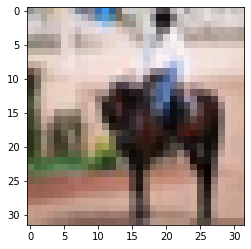

In [35]:
plt.imshow(x_train[11])

In [36]:
x_train[11]

array([[[142, 149, 152],
        [172, 172, 167],
        [176, 168, 154],
        ...,
        [216, 212, 211],
        [198, 194, 193],
        [205, 202, 200]],

       [[191, 190, 192],
        [196, 192, 190],
        [174, 166, 159],
        ...,
        [229, 222, 220],
        [222, 215, 213],
        [217, 210, 207]],

       [[220, 212, 212],
        [217, 209, 208],
        [192, 183, 182],
        ...,
        [224, 214, 209],
        [225, 214, 210],
        [218, 208, 203]],

       ...,

       [[197, 152, 136],
        [196, 152, 135],
        [201, 156, 140],
        ...,
        [200, 165, 146],
        [199, 165, 146],
        [205, 164, 150]],

       [[196, 157, 139],
        [191, 152, 135],
        [193, 154, 136],
        ...,
        [198, 164, 144],
        [199, 165, 145],
        [201, 161, 146]],

       [[186, 150, 133],
        [182, 147, 130],
        [174, 139, 121],
        ...,
        [158, 124, 105],
        [158, 125, 106],
        [163, 125, 111]]

### Data PreProcessing

In [37]:
# Normalization
x_train = x_train/255
x_test = x_test/255

In [38]:
x_train[11]

array([[[0.55686275, 0.58431373, 0.59607843],
        [0.6745098 , 0.6745098 , 0.65490196],
        [0.69019608, 0.65882353, 0.60392157],
        ...,
        [0.84705882, 0.83137255, 0.82745098],
        [0.77647059, 0.76078431, 0.75686275],
        [0.80392157, 0.79215686, 0.78431373]],

       [[0.74901961, 0.74509804, 0.75294118],
        [0.76862745, 0.75294118, 0.74509804],
        [0.68235294, 0.65098039, 0.62352941],
        ...,
        [0.89803922, 0.87058824, 0.8627451 ],
        [0.87058824, 0.84313725, 0.83529412],
        [0.85098039, 0.82352941, 0.81176471]],

       [[0.8627451 , 0.83137255, 0.83137255],
        [0.85098039, 0.81960784, 0.81568627],
        [0.75294118, 0.71764706, 0.71372549],
        ...,
        [0.87843137, 0.83921569, 0.81960784],
        [0.88235294, 0.83921569, 0.82352941],
        [0.85490196, 0.81568627, 0.79607843]],

       ...,

       [[0.77254902, 0.59607843, 0.53333333],
        [0.76862745, 0.59607843, 0.52941176],
        [0.78823529, 0

In [39]:
y_train[0]

array([6], dtype=uint8)

In [40]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [41]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Model Building

In [42]:
model = keras.Sequential([
                          keras.layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Conv2D(64,(3,3),activation='relu'),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(256,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               590080    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2
)
train_gen= train_datagen.flow(x_train,y_train, batch_size=32)

test_datagen= ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2
)
train_gen= test_datagen.flow(x_test,y_test, batch_size=32)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')

In [50]:
model.fit_generator(
    train_gen,
    epochs=15,
    validation_data=train_gen,
    callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
313/313 [==============================] - 10s 31ms/step - loss: 1.8050 - accuracy: 0.3469 - val_loss: 1.5714 - val_accuracy: 0.4248
Epoch 2/15
313/313 [==============================] - 10s 32ms/step - loss: 1.4834 - accuracy: 0.4741 - val_loss: 1.3343 - val_accuracy: 0.5225
Epoch 3/15
313/313 [==============================] - 10s 32ms/step - loss: 1.3262 - accuracy: 0.5252 - val_loss: 1.2104 - val_accuracy: 0.5711
Epoch 4/15
313/313 [==============================] - 9s 30ms/step - loss: 1.2165 - accuracy: 0.5637 - val_loss: 1.1229 - val_accuracy: 0.6022
Epoch 5/15
313/313 [==============================] - 9s 29ms/step - loss: 1.1328 - accuracy: 0.5976 - val_loss: 1.0678 - val_accuracy: 0.6221
Epoch 6/15
313/313 [==============================] - 9s 29ms/step - loss: 1.0468 - accuracy: 0.6300 - val_loss: 0.9358 - val_accuracy: 0.6772
Epoch 7/15
313/313 [==============================] - 9s 29ms/step - loss: 0.9703 - accuracy: 0.6586 - val_loss: 0.9062 - val_accuracy: 0.6

In [53]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.805025,0.3469,1.571356,0.4248
1,1.483397,0.4741,1.334289,0.5225
2,1.326214,0.5252,1.210426,0.5711
3,1.216496,0.5637,1.122947,0.6022
4,1.132837,0.5976,1.067805,0.6221
5,1.046787,0.6300,0.935811,0.6772
6,0.970269,0.6586,0.906246,0.6771
7,0.898349,0.6829,0.783292,0.7332
8,0.827621,0.7086,0.775143,0.7286
9,0.765398,0.7304,0.680807,0.7658


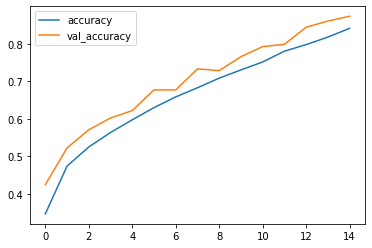

In [54]:
metrics[['accuracy','val_accuracy']].plot()

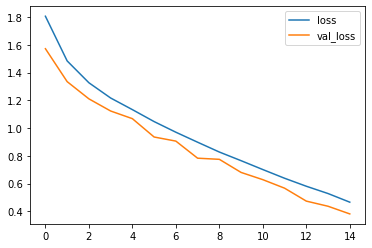

In [55]:
metrics[['loss','val_loss']].plot()

### Testing our model

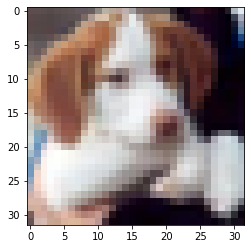

In [56]:
plt.imshow(x_test[16])

In [57]:
model.predict_classes(x_test[16].reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])

In [59]:
np.argmax(y_test[16])

5

### Plotting the model

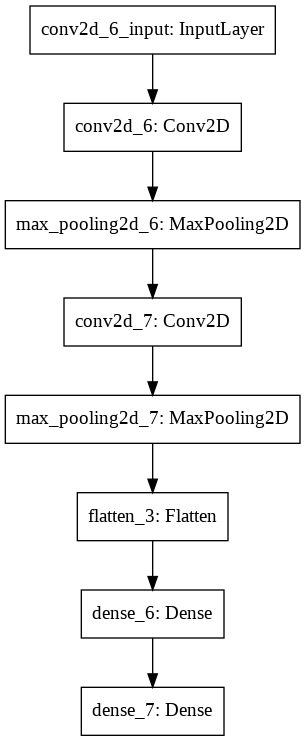

In [60]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
)